In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from textblob import TextBlob

In [5]:
df = pd.read_csv('edge_list.csv')
df.head()

,Source,Target,author_parent,score,body,post_title,post_content,subreddit
0,cornonthekopp,jele0mw,evolvedbeing,1,Greenwashing what lol,The return of silvopasture This ancient practi...,NaN,environment
1,veganplantdaddy,jeklp75,EpicCurious,4,I love reading the absolute brain-dead respons...,The return of silvopasture This ancient practi...,NaN,environment
2,veganplantdaddy,jeka4hl,AmericanSwampApe,8,Exactly zero aspects of animal agriculture are...,The return of silvopasture This ancient practi...,NaN,environment
3,reflibman,jeka4hl,AmericanSwampApe,1,Got some evidence-based proof? Google Scholar ...,The return of silvopasture This ancient practi...,NaN,environment
4,reflibman,jenoarf,Cheesepleasethankyou,0,"As I see it, many forget that humans are omniv...",The return of silvopasture This ancient practi...,NaN,environment


In [6]:
# Define a function to calculate sentiment score using TextBlob
def get_sentiment(body):
    # Create a TextBlob object from the input text (body)
    blob = TextBlob(body)
    
    # Calculate the polarity of the sentiment (range from -1 to 1)
    sentiment = blob.sentiment.polarity
    
    # Return the calculated sentiment score
    return sentiment

# Apply the get_sentiment function to the 'body' column of the DataFrame and create a new column 'sentiment_score'
df['sentiment_score'] = df['body'].apply(get_sentiment)


In [14]:
score_stats = df['score'].describe()
sentiment_stats = df['sentiment_score'].describe()

# Print the summary statistics for 'score'
print("Score Statistics:")
print(score_stats)

# Print the summary statistics for 'sentiment'
print("\nSentiment Statistics:")
print(sentiment_stats)

Score Statistics:
count    6405.000000
mean        8.279469
std        39.563151
min       -50.000000
25%         1.000000
50%         1.000000
75%         4.000000
max      1314.000000
Name: score, dtype: float64

Sentiment Statistics:
count    6405.000000
mean        0.069413
std         0.235955
min        -1.000000
25%         0.000000
50%         0.020714
75%         0.184091
max         1.000000
Name: sentiment_score, dtype: float64


In [15]:
correlation = df['score'].corr(df['sentiment_score'])

# Print the correlation coefficient
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.0030179453427259125


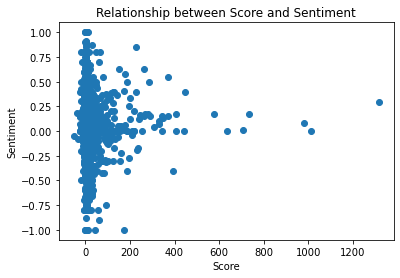

In [16]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' with columns 'score' and 'sentiment'
x = df['score']
y = df['sentiment_score']

# Plot the scatter plot
plt.scatter(x, y)
plt.xlabel('Score')
plt.ylabel('Sentiment')
plt.title('Relationship between Score and Sentiment')
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'topics' column values to strings
df['topics'] = df['topics'].astype(str)

# Group the data by 'topics' and calculate average score and sentiment
grouped_data = df.groupby('topics').agg({'score': 'mean', 'sentiment_score': 'mean'}).reset_index()

# Visualize average scores for different topics using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(grouped_data['topics'], grouped_data['score'])
plt.xlabel('Topic')
plt.ylabel('Average Score')
plt.title('Average Score by Topic')
plt.xticks(rotation=90)
plt.show()

# Visualize average sentiments for different topics using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(grouped_data['topics'], grouped_data['sentiment_score'])
plt.xlabel('Topic')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Topic')
plt.xticks(rotation=90)
plt.show()


NameError: name 'df' is not defined

In [27]:
unique_topics = df['topics'].unique()
unique_topics

array(["['scientific', 'scientists', 'scientist', 'science', 'studies', 'research', 'evidence', 'citation', 'credible', 'conclusions']",
       "['livestock', 'agriculture', 'farms', 'grazing', 'cows', 'cattle', 'farming', 'vegan', 'crops', 'vegans']",
       "['trees', 'forests', 'deforestation', 'tree', 'forest', 'planting', 'planted', 'saplings', 'seedlings', 'plants']",
       "['corporations', 'consumers', 'consumerism', 'consumer', 'companies', 'corporate', 'profits', 'shareholders', 'company', 'economy']",
       "['lmao', 'hahaha', 'lol', 'hahahaha', 'baahahhaahhahhaha', 'username', 'fuck', 'erk', 'next', 'shut']",
       "['groundwater', 'watering', 'water', 'rainfall', 'sewage', 'aquifers', 'river', 'basin', 'watershed', 'rivers']",
       "['adopt', 'adoption', 'kids', 'children', 'childrens', 'parents', 'kid', 'child', 'reasons', 'raising']",
       "['atheism', 'religious', 'religions', 'atheist', 'religion', 'christians', 'religiois', 'christian', 'preach', 'bible']",
   

In [30]:
import numpy as np
from scipy.stats import ttest_ind, f_oneway

# Select the data for each topic
topic1_scores = df[np.isin(df['topics'], ['topic1','topic2','topic3'])]['score']
topic2_scores = df[np.isin(df['topics'], ['topic1','topic2','topic3'])]['score']

In [31]:
# T-Test
t_statistic, p_value = ttest_ind(topic1_scores, topic2_scores)

# ANOVA
f_statistic, p_value = f_oneway(topic1_scores, topic2_scores)


/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


In [32]:
if p_value < 0.05:
    print("There is a significant difference between the topics.")
else:
    print("There is no significant difference between the topics.")

There is no significant difference between the topics.


In [33]:
import numpy as np
from scipy.stats import ttest_ind

# List of unique topics
topics = df['topics'].unique()

# Empty list to store significantly different topic pairs
significant_topics = []

# Iterate through each topic pair
for i in range(len(topics)):
    for j in range(i+1, len(topics)):
        # Select the scores for the two topics
        topic1_scores = df[df['topics'] == topics[i]]['score']
        topic2_scores = df[df['topics'] == topics[j]]['score']
        
        # Perform t-test
        t_statistic, p_value = ttest_ind(topic1_scores, topic2_scores)
        
        # Check if p-value is less than significance level (e.g., 0.05)
        if p_value < 0.05:
            significant_topics.append((topics[i], topics[j]))
            
# Print the significantly different topic pairs
for pair in significant_topics:
    print(f"There is a significant difference between topics: {pair[0]} and {pair[1]}")


There is a significant difference between topics: ['scientific', 'scientists', 'scientist', 'science', 'studies', 'research', 'evidence', 'citation', 'credible', 'conclusions'] and ['trees', 'forests', 'deforestation', 'tree', 'forest', 'planting', 'planted', 'saplings', 'seedlings', 'plants']
There is a significant difference between topics: ['scientific', 'scientists', 'scientist', 'science', 'studies', 'research', 'evidence', 'citation', 'credible', 'conclusions'] and ['corporations', 'consumers', 'consumerism', 'consumer', 'companies', 'corporate', 'profits', 'shareholders', 'company', 'economy']
There is a significant difference between topics: ['scientific', 'scientists', 'scientist', 'science', 'studies', 'research', 'evidence', 'citation', 'credible', 'conclusions'] and ['groundwater', 'watering', 'water', 'rainfall', 'sewage', 'aquifers', 'river', 'basin', 'watershed', 'rivers']
There is a significant difference between topics: ['scientific', 'scientists', 'scientist', 'scienc